In [3]:
%load_ext autoreload

# aproximacion inicial (1.1) Gauss Jacobi 

In [4]:
%autoreload 2
from src import gauss_jacobi
#E1   Matriz Original 
A = [[2, 10],
     [3, 2 ]]
b = [16,11]
x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_jacobi(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)


[01-25 17:44:03][INFO] 2025-01-25 17:44:03.127943
[01-25 17:44:12][INFO] 2025-01-25 17:44:12.544142
[01-25 17:44:12][INFO] i= 0 x: [[1. 1.]]
[01-25 17:44:12][INFO] i= 1 x: [[3. 4.]]
[01-25 17:44:12][INFO] i= 2 x: [[-12.   1.]]
[01-25 17:44:12][INFO] i= 3 x: [[ 3.  23.5]]
[01-25 17:44:12][INFO] i= 4 x: [[-109.5    1. ]]
[01-25 17:44:12][INFO] i= 5 x: [[  3.   169.75]]
[01-25 17:44:12][INFO] i= 6 x: [[-840.75    1.  ]]
[01-25 17:44:12][INFO] i= 7 x: [[   3.    1266.625]]
[01-25 17:44:12][INFO] i= 8 x: [[-6.325125e+03  1.000000e+00]]
[01-25 17:44:12][INFO] i= 9 x: [[3.0000000e+00 9.4931875e+03]]


(array([[3.0000000e+00],
        [9.4931875e+03]]),
 [array([[1.],
         [1.]]),
  array([[3.],
         [4.]]),
  array([[-12.],
         [  1.]]),
  array([[ 3. ],
         [23.5]]),
  array([[-109.5],
         [   1. ]]),
  array([[  3.  ],
         [169.75]]),
  array([[-840.75],
         [   1.  ]]),
  array([[   3.   ],
         [1266.625]]),
  array([[-6.325125e+03],
         [ 1.000000e+00]]),
  array([[3.0000000e+00],
         [9.4931875e+03]])])

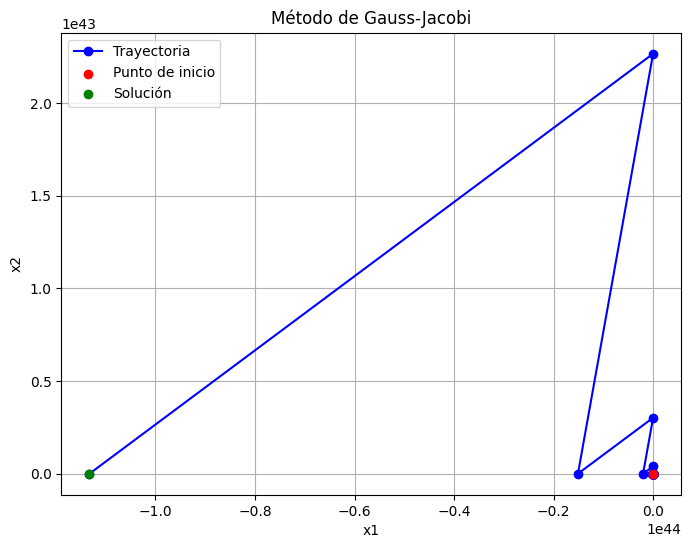

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_jacobi(A, b, x0, tol=1e-6, max_iter=100):
 
    A = np.array(A, float)
    b = np.array(b, float)
    x = np.array(x0, float)

    n = A.shape[0]
    D = np.diag(A)
    R = A - np.diagflat(D)
    
    historial = [x.copy()]

    for _ in range(max_iter):
        x_nuevo = np.zeros_like(x)
        for i in range(n):
            x_nuevo[i] = (b[i] - np.dot(R[i], x)) / D[i]
        historial.append(x_nuevo.copy())

    
        if np.linalg.norm(x_nuevo - x, ord=np.inf) < tol:
            x = x_nuevo
            break
        x = x_nuevo

    return x, historial


A = np.array([[2, 10],
              [3,  2]], dtype=float)
b = np.array([16, 11], dtype=float)
x0 = np.array([1, 1], dtype=float)

tol = 1e-6
max_iter = 100

solucion, tray = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)


tray = np.array([x.flatten() for x in tray])  
plt.figure(figsize=(8, 6))

plt.plot(tray[:, 0], tray[:, 1], marker='o', color='b', label='Trayectoria')

plt.scatter(x0[0], x0[1], color='r', label='Punto de inicio', zorder=5)

plt.scatter(solucion[0], solucion[1], color='g', label='Solución', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Método de Gauss-Jacobi')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
%autoreload 2
from src import gauss_jacobi
#E1
A = [[3, 2 ],
     [2, 10]] # con cambio de filas
b = [11,16]

x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_jacobi(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)




[01-25 18:00:02][INFO] i= 0 x: [[1. 1.]]
[01-25 18:00:02][INFO] i= 1 x: [[3.  1.4]]
[01-25 18:00:02][INFO] i= 2 x: [[2.73333333 1.        ]]
[01-25 18:00:02][INFO] i= 3 x: [[3.         1.05333333]]


(array([[2.96444444],
        [1.        ]]),
 [array([[1.],
         [1.]]),
  array([[3. ],
         [1.4]]),
  array([[2.73333333],
         [1.        ]]),
  array([[3.        ],
         [1.05333333]])])

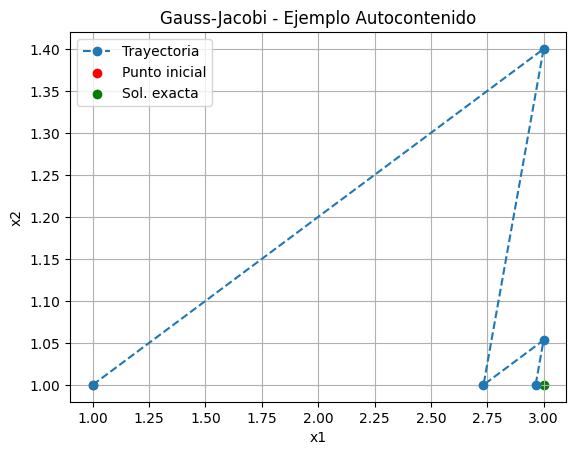

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gauss_jacobi_ejemplo(A, b, x0, tol=1e-2, max_iter=10):
    A = np.array(A, float)
    b = np.array(b, float)
    x = np.array(x0, float)
    
    n = A.shape[0]
    D = np.diag(A)
    R = A - np.diagflat(D)
    
    historial = [x.copy()]  
    
    for _ in range(max_iter):
        x_nuevo = np.zeros_like(x)
        for i in range(n):
            x_nuevo[i] = (b[i] - np.dot(R[i], x)) / D[i]
        historial.append(x_nuevo.copy())
        
        if np.linalg.norm(x_nuevo - x, ord=np.inf) < tol:
            x = x_nuevo
            break
        x = x_nuevo
    
    return historial

A = [[3, 2],
     [2, 10]]
b = [11, 16]
x0 = [1, 1]

trayectoria = gauss_jacobi_ejemplo(A, b, x0, tol=0.1, max_iter=10)
trayectoria = np.array(trayectoria)

plt.figure()
plt.plot(trayectoria[:,0], trayectoria[:,1], 'o--', label='Trayectoria')
plt.scatter(x0[0], x0[1], color='red', label='Punto inicial')
A_np = np.array(A, float)
b_np = np.array(b, float)
sol = np.linalg.solve(A_np, b_np)
plt.scatter(sol[0], sol[1], color='green', label='Sol. exacta')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gauss-Jacobi - Ejemplo Autocontenido')
plt.grid(True)
plt.legend()
plt.show()


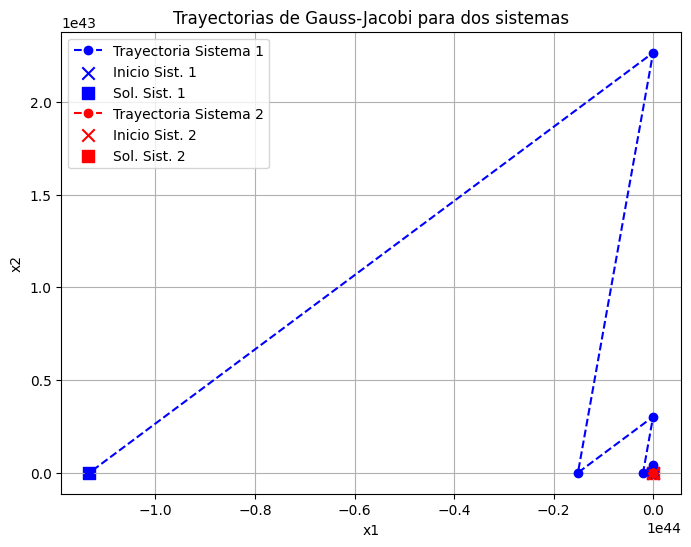

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gauss_jacobi(A, b, x0, tol=1e-6, max_iter=100):
    A = np.array(A, float)
    b = np.array(b, float)
    x = np.array(x0, float)

    n = A.shape[0]
    D = np.diag(A)
    R = A - np.diagflat(D)
    
    historial = [x.copy()]

    for _ in range(max_iter):
        x_nuevo = np.zeros_like(x)
        for i in range(n):
            x_nuevo[i] = (b[i] - np.dot(R[i], x)) / D[i]
        historial.append(x_nuevo.copy())

        if np.linalg.norm(x_nuevo - x, ord=np.inf) < tol:
            x = x_nuevo
            break
        x = x_nuevo

    return x, historial


def gauss_jacobi_ejemplo(A, b, x0, tol=1e-2, max_iter=10):
    A = np.array(A, float)
    b = np.array(b, float)
    x = np.array(x0, float)
    
    n = A.shape[0]
    D = np.diag(A)
    R = A - np.diagflat(D)
    
    historial = [x.copy()]  
    
    for _ in range(max_iter):
        x_nuevo = np.zeros_like(x)
        for i in range(n):
            x_nuevo[i] = (b[i] - np.dot(R[i], x)) / D[i]
        historial.append(x_nuevo.copy())
        
        if np.linalg.norm(x_nuevo - x, ord=np.inf) < tol:
            x = x_nuevo
            break
        x = x_nuevo
    
    return historial


# PRIMER SISTEMA
A1 = [[2, 10],
      [3,  2]]
b1 = [16, 11]
x01 = [1, 1]

sol1, tray1 = gauss_jacobi(A1, b1, x01, tol=1e-6, max_iter=100)
tray1 = np.array(tray1)  # shape = (n_iter, 2)


# SEGUNDO SISTEMA
A2 = [[3, 2],
      [2, 10]]
b2 = [11, 16]
x02 = [1, 1]

tray2 = gauss_jacobi_ejemplo(A2, b2, x02, tol=0.1, max_iter=10)
tray2 = np.array(tray2)  # shape = (n_iter, 2)
sol2 = np.linalg.solve(np.array(A2,float), np.array(b2,float))

# GRAFICAR AMBAS TRAYECTORIAS EN UNA SOLA FIGURA

plt.figure(figsize=(8, 6))

# Trayectoria del primer sistema
plt.plot(tray1[:,0], tray1[:,1], 'o--', color='blue', label='Trayectoria Sistema 1')
plt.scatter(x01[0], x01[1], color='blue', marker='x', s=80, label='Inicio Sist. 1')
plt.scatter(sol1[0], sol1[1], color='blue', marker='s', s=80, label='Sol. Sist. 1')

# Trayectoria del segundo sistema
plt.plot(tray2[:,0], tray2[:,1], 'o--', color='red', label='Trayectoria Sistema 2')
plt.scatter(x02[0], x02[1], color='red', marker='x', s=80, label='Inicio Sist. 2')
plt.scatter(sol2[0], sol2[1], color='red', marker='s', s=80, label='Sol. Sist. 2')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trayectorias de Gauss-Jacobi para dos sistemas')
plt.grid(True)
plt.legend()
plt.show()


# aproximacion inicial (1.1) Gauss Seidel

In [35]:
%autoreload 2
from src import gauss_seidel

#E1
A = [[3, 2 ],[2, 10]]
b = [11,16]

x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_seidel(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)

[01-24 11:01:40][INFO] i= 0 x: [[1. 1.]]
[01-24 11:01:40][INFO] i= 1 x: [[3. 1.]]


(array([[3.],
        [1.]]),
 [array([[1.],
         [1.]]),
  array([[3.],
         [1.]])])

In [36]:
%autoreload 2
from src import gauss_seidel
# E2
A =[[2, 10], [3, 2 ]]
b = [16,11]

x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_seidel(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)

[01-24 11:01:42][INFO] i= 0 x: [[1. 1.]]
[01-24 11:01:42][INFO] i= 1 x: [[3. 1.]]


(array([[3.],
        [1.]]),
 [array([[1.],
         [1.]]),
  array([[3.],
         [1.]])])

# aproximacion inicial (5,-2) Gauss Jacobi 